In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/NELIUS/Downloads/archive/WeatherData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
df.shape

(8784, 8)

In [5]:
df.isnull()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8779,False,False,False,False,False,False,False,False
8780,False,False,False,False,False,False,False,False
8781,False,False,False,False,False,False,False,False
8782,False,False,False,False,False,False,False,False


In [6]:
df.fillna(value=0)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


I used the fillna command to maintain the dataframe shape as this will allow me to handle missing values without losing data.

The fillna command makes it flexible to fill different columns with different values.

In [7]:
duplicates=df.duplicated()

In [8]:
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [9]:
duplicate_rows = df[df.duplicated(keep=False)]

In [10]:
duplicate_rows

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


In [11]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [12]:
df2 = df

In [13]:
df2= df.drop(['Date/Time','Weather'],axis=1)

In [14]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [15]:
outliers = (df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))

In [16]:
outliers

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
8779,False,False,False,False,True,False
8780,False,False,False,False,True,False
8781,False,False,False,False,True,False
8782,False,False,False,False,True,False


In [17]:
outlier_values = df2[outliers.any(axis=1)]

In [18]:
outlier_values

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [19]:
z_scores=(df2 - df2.mean()) / df2.std()

In [20]:
z_scores

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-0.906763,-0.593150,1.097490,-1.259737,-1.557865,0.223194
1,-0.906763,-0.574773,1.156596,-1.259737,-1.557865,0.223194
2,-0.906763,-0.547207,1.274807,-0.914460,-1.874755,0.246890
3,-0.881096,-0.528830,1.215701,-1.029553,-1.874755,0.258739
4,-0.881096,-0.538018,1.215701,-0.914460,-1.811377,0.211345
...,...,...,...,...,...,...
8779,-0.744202,-0.482887,0.801962,1.732657,-1.423187,-1.091965
8780,-0.735646,-0.455321,0.920173,1.042105,-1.423187,-1.210447
8781,-0.795537,-0.372624,1.511229,1.502473,-1.811377,-1.305234
8782,-0.769869,-0.400190,1.274807,1.502473,-1.423187,-1.352627


In [21]:
z_scores_A = (df2['Temp_C'] - df2['Temp_C'].mean()) / df2['Temp_C'].std()

In [22]:
z_scores_A = (df2['Dew Point Temp_C'] - df2['Dew Point Temp_C'].mean()) / df2['Dew Point Temp_C'].std()

In [23]:
z_scores_A = (df2['Rel Hum_%'] - df2['Rel Hum_%'].mean()) / df2['Rel Hum_%'].std()

In [24]:
z_scores_A = (df2['Wind Speed_km/h'] - df2['Wind Speed_km/h'].mean()) / df2['Wind Speed_km/h'].std()

In [25]:
z_scores_A = (df2['Visibility_km'] - df2['Visibility_km'].mean()) / df2['Visibility_km'].std()

In [26]:
z_scores_A = (df2['Press_kPa'] - df2['Press_kPa'].mean()) / df2['Press_kPa'].std()

In [27]:
import matplotlib.pyplot as plt

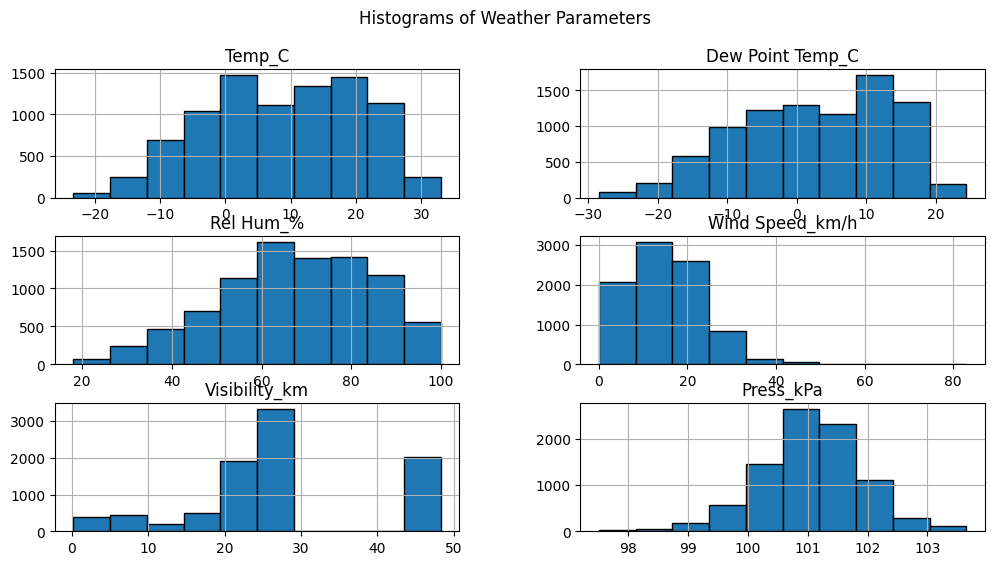

In [28]:
df2.hist(figsize=(12, 6), bins=10, edgecolor='black')
plt.suptitle('Histograms of Weather Parameters')
plt.show()

In [29]:
import seaborn as sns

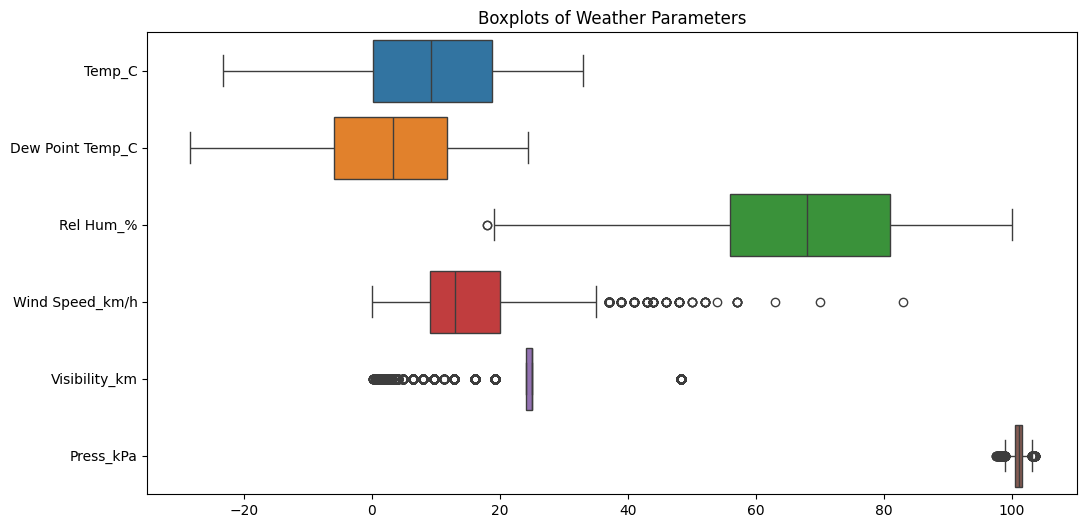

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, orient='h')
plt.title('Boxplots of Weather Parameters')
plt.show()

In [31]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Temp_C vs Dew Point Temp_C')

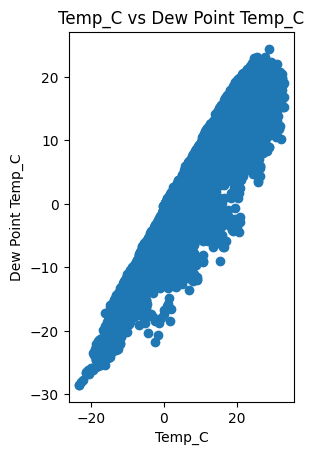

In [32]:
plt.subplot(1, 2, 1)
plt.scatter(df2['Temp_C'], df2['Dew Point Temp_C'])
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.title('Temp_C vs Dew Point Temp_C')

Text(0.5, 1.0, 'Rel Hum_% vs Wind Speed_km/h')

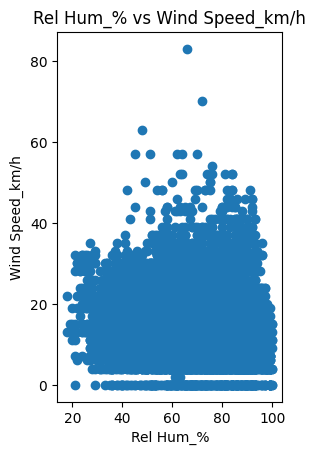

In [33]:
plt.subplot(1, 2, 2)
plt.scatter(df2['Rel Hum_%'], df2['Wind Speed_km/h'])
plt.xlabel('Rel Hum_%')
plt.ylabel('Wind Speed_km/h')
plt.title('Rel Hum_% vs Wind Speed_km/h')

In [35]:
df3=pd.DataFrame(df2)

In [36]:
corr_matrix = df3.corr()

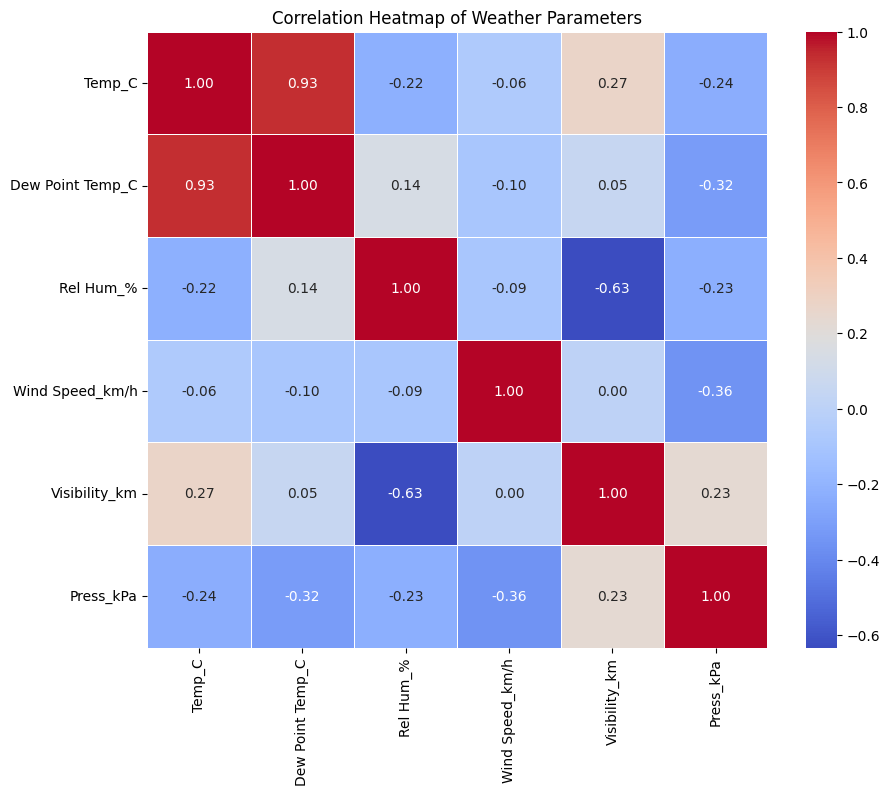

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Weather Parameters')
plt.show()

In [43]:
df4=df

In [53]:
df4=df.drop(['Weather'],axis=1)

In [45]:
df4['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [49]:
dfmonthly = df4.resample('M', on='Date/Time').mean()

C:\Users\NELIUS\AppData\Local\Temp\ipykernel_5992\3403181078.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfmonthly = df4.resample('M', on='Date/Time').mean()


Text(0.5, 1.0, 'Rel Hum_%')

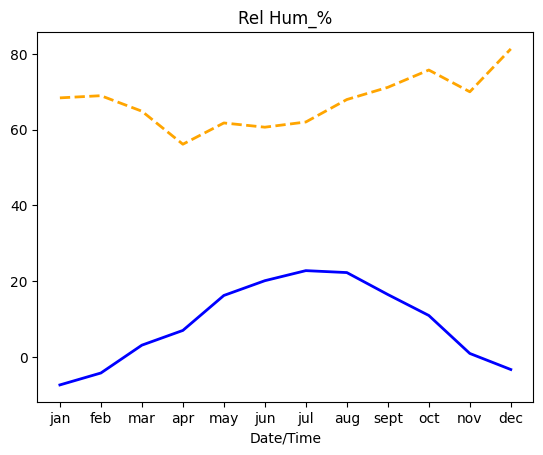

In [56]:
x=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']
y1=dfmonthly['Temp_C']
y2=dfmonthly['Rel Hum_%']
plt.plot(x, y1, color='blue', linestyle='-', linewidth=2, label='Temp_C')
plt.plot(x, y2, color='orange', linestyle='--', linewidth=2, label='Rel Hum_%')
plt.xlabel('Date/Time')
plt.title('Date/Time vs Temp_C'and 'Rel Hum_%')

The higher the temperature the lower the humidity